My solution to
## The secretary problem


Based on the [Numberphile video about toilets](https://www.youtube.com/watch?v=ZWib5olGbQ0)

### Run this:

In [17]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

def the_secretary_problem(min_range=10, max_range=100, steps=1, how_many_samples_of_each_length=20, best_option_chosen=False):
    """
    This is the over-arching function, taking a simluation parameters and implements them.
    """
    
    def pick_the_best_after_p(observations, p, only_best=False):
        """
        This is the core function.
        
        It takes observaitons, picks the best out of the first p% of them, and picks the next best one.
        
        Iff only_best: then return 1 if best possible observation picked,
            else: return how good the observation picked is compared to the best, as ratio. 
        """
        limit = round(len(observations) * p)
        max_so_far = max(observations[:limit]) if limit > 0 else observations[0]
        chosen = next((x for x in observations[limit:] if x > max_so_far), observations[-1])

        result = chosen / (len(observations) - 1)
        if(only_best):
            result = int(result)
        return result

    # We will check all possible sizes of arrays between min_range and max_range,
    # leaping in steps between them
    elements_per_sample = range(min_range,max_range,steps)

    # -------------------------------------
    # Setting up the simulation environment
    # -------------------------------------
    environments = []
    for sample_length in elements_per_sample:
        temp_dict = {'elements in each sample': sample_length, 'experiments': []}
        for n in range(how_many_samples_of_each_length):
            random_sample = [i for i in range(round(sample_length))]
            random.shuffle(random_sample)
            temp_dict['experiments'].append(random_sample)
        environments.append(temp_dict)

    #--------------------------------------------------
    # Running the simulation itself and saving the data
    #--------------------------------------------------
    data = {}

    # The skipping-percentages we will check, 0%-100%
    # with as many intervals as the max elements per sample, to assert it has a meaning
    ps = np.linspace(0, 1, max(elements_per_sample))
    
    for environment in tqdm(environments):
        column_data = []

        elements_in_each_sample = round(environment['elements in each sample'])
        experiments = environment['experiments']

        for p in ps:
            res = sum(pick_the_best_after_p(observations, p, best_option_chosen) for observations in experiments) / len(experiments)
            column_data.append(res)

        data[elements_in_each_sample] = column_data

    
    # ---------------------------------
    # Create a DataFrame of the results
    # ---------------------------------
    
    df = pd.DataFrame(data, index=[f'{int(round(p*100,0))}%' for p in ps])
    df = df.iloc[:, ::-1].T

    rng = f'{min(elements_per_sample)}-{max(elements_per_sample)}'
    confidence = how_many_samples_of_each_length
    p_steps = max(elements_per_sample)

    title = f'Best-option-Only-{best_option_chosen} rng-{rng} psteps-{p_steps} conf-{confidence}'

    
    # -------------------------------------------------
    # Create a heatmap of the results for visualizaiton
    # -------------------------------------------------
    
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(df, ax=ax, cmap='gray')

    fig.suptitle(title)

    ax.set_xlabel("View p% of total before choosing", fontsize=14)
    ax.set_ylabel("Array size", fontsize=14)

    plt.savefig(f'{title}.png')

### And then change the parameters here, and run:

100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [01:55<00:00,  1.27s/it]


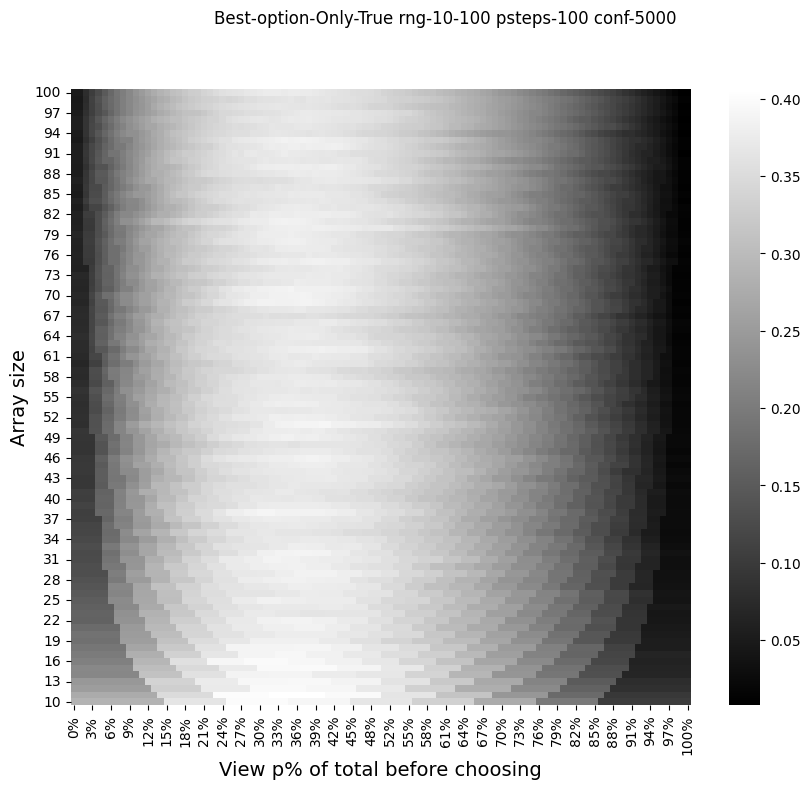

In [16]:
# Choose a range. E.g. From min_range= 10to max_range=100.
# This simulates the amount of "options" you could eventually choose from
# e.g. min_range = 10
# e.g. max_range = 100
min_range = 10
max_range = 100



# Say you picked range 10->100. Step size of 2 will give range=[10,12,14,...,98]
# e.g. step_size = 1
step_size = 1



# High number is more accurate, but slower.
# 50-100 is usually a good choice.
# E.g. confidence = 70
confidence = 70



# Boolean: Should the algorithm count only if absolute best option achieved (True), or try to optimize in general (False).
# E.g. best_option_chosen = False
best_option_chosen = True



the_secretary_problem(min_range, max_range+step_size, step_size, confidence, best_option_chosen)